# Explore here

**<span style="color:#004080;">ADVANCED FORECASTING OF VARIABLE RENEWABLE POWER GENERATION</span>**


**<span style="color:#004080;">"Weather directly impacts renewable energy generation. We are going to find the key to unlocking those secrets."</span>**




**<span style="color:black;">We introduce ourselves:</span>**  
**<span style="color:black;">Olga</span>**  
**<span style="color:black;">Javier</span>**  
**<span style="color:black;">Fernando</span>**

In [17]:
# Your code here
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

In [18]:
# Your code here
import pandas as pd

dataset = pd.read_csv('../data/raw/Renewable.csv')
dataset

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


In [19]:
dataset1 = pd.read_csv('../data/raw/Renewable.csv')
dataset1

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


In [21]:
import requests
import time

# Seleccionar el recurso a descargar
url = "https://www.kaggle.com/datasets/pythonafroz/renewable-power-generation-and-weather-conditions/data"


# Petición para descargar el fichero de Internet
response = requests.get(url)

# Si la petición se ha ejecutado correctamente (código 200), entonces el fichero se ha podido descargar
if response:
    # Se almacena el archivo en el directorio actual para usarlo más tarde
    with open("../data/raw/Renewable1.csv", "wb") as dataset:
        dataset.write(response.content)

#### Paso 2. Exploración y limpieza superficial

##### 1. Dimensiones del problema

In [24]:
dataset.shape

AttributeError: '_io.BufferedWriter' object has no attribute 'shape'

In [25]:
dataset1.shape

(196776, 17)

**<span style="color:black;">The shape attribute in Python is used to get the dimensions of an array or DataFrame. In this case, the dataset has </span>**  
**<span style="color:black;">196,776 rows and 17 columns.</span>** 

##### 2. Valores nulos / no nulos

In [26]:
dataset.head()

AttributeError: '_io.BufferedWriter' object has no attribute 'head'

In [27]:
print("From Time : ",dataset['Time'].min())
print("To Time   : ",dataset['Time'].max())

TypeError: '_io.BufferedWriter' object is not subscriptable

In [ ]:
# Obtener los nombres de las columnas
column_names = dataset.columns

# Imprimir los nombres de las columnas
print("Nombres de las columnas:")
for column_name in column_names:
    print(column_name)

# Imprimir el contenido del conjunto de datos línea por línea
# print("\nContenido del conjunto de datos:")
# for index, row in dataset.iterrows():
    # print(row)

Nombres de las columnas:
Time
Energy delta[Wh]
GHI
temp
pressure
humidity
wind_speed
rain_1h
snow_1h
clouds_all
isSun
sunlightTime
dayLength
SunlightTime/daylength
weather_type
hour
month


In [ ]:
dataset['Time'] = pd.to_datetime(dataset['Time'])
dataset.head(50)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
5,2017-01-01 01:15:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
6,2017-01-01 01:30:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
7,2017-01-01 01:45:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
8,2017-01-01 02:00:00,0,0.0,1.9,1020,100,5.5,0.0,0.0,100,0,0,450,0.00,4,2,1
9,2017-01-01 02:15:00,0,0.0,1.9,1020,100,5.5,0.0,0.0,100,0,0,450,0.00,4,2,1


In [14]:
dataset =dataset[dataset['Energy delta[Wh]'] != 0]
dataset.head()

TypeError: '_io.BufferedWriter' object is not subscriptable



Filtrar el conjunto de datos: Utiliza la función de indexación booleana para seleccionar solo las filas del conjunto de datos donde el valor en la columna "Energy delta[Wh]" es distinto de cero. Esto significa que elimina todas las filas donde no hay un cambio en la energía, es decir, donde la energía delta es cero.
Mostrar las primeras filas del conjunto de datos resultante: Utiliza el método head() para mostrar las primeras filas del conjunto de datos después de aplicar el filtro. Esto proporciona una vista previa de cómo se ve el conjunto de datos después de la eliminación de las filas con energía delta cero.

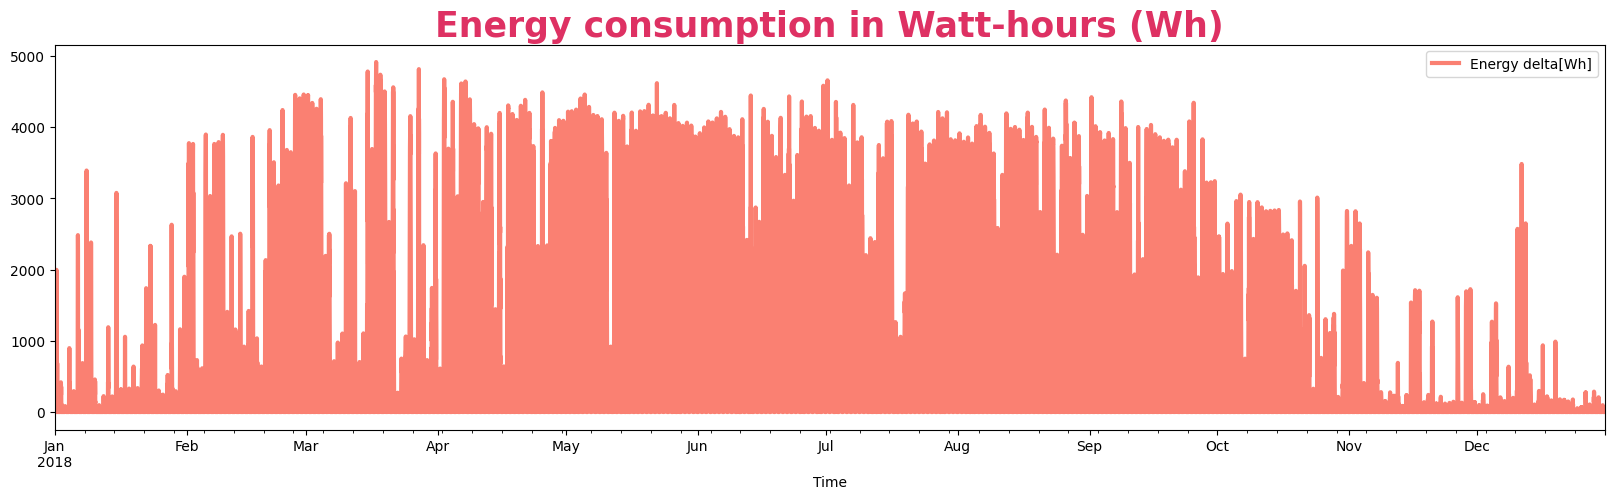

In [ ]:
dataset1 = dataset[['Time','Energy delta[Wh]']].copy('Deep')
dataset1 = dataset1.set_index('Time')
dataset_2018 =dataset1[(dataset1.index >= '2018-01-01') & (dataset1.index < '2018-12-31')]
dataset_2018.plot(figsize=(20,5), lw=3,color = '#FA8072')
plt.title('Energy consumption in Watt-hours (Wh)', weight='bold', fontsize=25,color = '#DE3163'); 

Visualización: Trama el DataFrame dataset_2018 con el tiempo en el eje x y el cambio de energía en el eje y. Se especifica el tamaño de la figura (figsize), el grosor de la línea (lw), y el color de la línea. Además, se agrega un título a la gráfica para indicar que muestra el consumo de energía en vatios-hora durante el año 2018

In [ ]:
# Obtener el contenido de la columna "weather_type"
weather_type_column = dataset['weather_type']

# Imprimir los valores únicos en la columna "weather_type"
unique_weather_types = weather_type_column.unique()
print("Valores únicos en la columna 'weather_type':")
for weather_type in unique_weather_types:
    print(weather_type)

Valores únicos en la columna 'weather_type':
4
5
3
2
1


In [ ]:
# Acceder a la columna "isSun" y mostrar sus valores
isSun_column = dataset['isSun']
print(isSun_column)

0         0
1         0
2         0
3         0
4         0
         ..
196771    1
196772    1
196773    1
196774    1
196775    0
Name: isSun, Length: 196776, dtype: int64


In [ ]:
dataset .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Time                    196776 non-null  datetime64[ns]
 1   Energy delta[Wh]        196776 non-null  int64         
 2   GHI                     196776 non-null  float64       
 3   temp                    196776 non-null  float64       
 4   pressure                196776 non-null  int64         
 5   humidity                196776 non-null  int64         
 6   wind_speed              196776 non-null  float64       
 7   rain_1h                 196776 non-null  float64       
 8   snow_1h                 196776 non-null  float64       
 9   clouds_all              196776 non-null  int64         
 10  isSun                   196776 non-null  int64         
 11  sunlightTime            196776 non-null  int64         
 12  dayLength               196776

In [ ]:
dataset.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

In [ ]:
# Verificar si hay duplicados en el DataFrame
duplicates = dataset1.duplicated().any()

# Imprimir el resultado
if duplicates:
    print("El DataFrame tiene duplicados.")
else:
    print("\033[94mEl DataFrame no tiene duplicados.\033[0m")

NameError: name 'dataset1' is not defined

In [ ]:
 dataset.describe()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,2019-10-29 22:44:12.085620992,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
min,2017-01-01 00:00:00,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,2018-06-02 10:26:15,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,2019-10-28 20:52:30,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,2021-03-24 07:18:45,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,2022-08-31 17:45:00,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000
std,NaN,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066


In [ ]:
# Paso 1: Identificar columnas categóricas
columnas_categoricas =  dataset.select_dtypes(include=['object']).columns
columnas_categoricas

Index([], dtype='object')

In [ ]:
dataset1.columns

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')

In [ ]:
# Seleccionar las columnas de interés
columns_of_interest1 = ['Time', 'Energy delta[Wh]', 'GHI',
                       'temp', 'pressure','snow_1h', 'clouds_all',
                       'humidity', 'wind_speed',
                       'rain_1h', 'dayLength', 'SunlightTime/daylength', 
       'hour']
clean_data1=dataset1[columns_of_interest1]
# Obtener una nueva DataFrame solo con las columnas de interés
clean_data1.describe()

,Energy delta[Wh],GHI,temp,pressure,snow_1h,clouds_all,humidity,wind_speed,rain_1h,dayLength,SunlightTime/daylength,hour
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,0.007148,65.974387,79.810566,3.937746,0.066035,748.644347,0.265187,11.498902
std,1044.824047,52.172018,7.995428,9.585773,0.069710,36.628593,15.604459,1.821694,0.278913,194.870208,0.329023,6.921887
min,0.000000,0.000000,-16.600000,977.000000,0.000000,0.000000,22.000000,0.000000,0.000000,450.000000,0.000000,0.000000
25%,0.000000,0.000000,3.600000,1010.000000,0.000000,34.000000,70.000000,2.600000,0.000000,570.000000,0.000000,5.000000
50%,0.000000,1.600000,9.300000,1016.000000,0.000000,82.000000,84.000000,3.700000,0.000000,765.000000,0.050000,11.000000
75%,577.000000,46.800000,15.700000,1021.000000,0.000000,100.000000,92.000000,5.000000,0.000000,930.000000,0.530000,17.000000
max,5020.000000,229.200000,35.800000,1047.000000,2.820000,100.000000,100.000000,14.300000,8.090000,1020.000000,1.000000,23.000000


In [ ]:
# Seleccionar las columnas de interés
columns_of_interest2 = [
                       'humidity'
       ]
clean_data1=dataset1[columns_of_interest2]
# Obtener una nueva DataFrame solo con las columnas de interés
clean_data1.describe()

,humidity
count,196776.000000
mean,79.810566
std,15.604459
min,22.000000
25%,70.000000
50%,84.000000
75%,92.000000
max,100.000000


In [ ]:
# Seleccionar las columnas de interés
columns_of_interest3 = [
                       'rain_1h'
       ]
clean_data1=dataset1[columns_of_interest3]
# Obtener una nueva DataFrame solo con las columnas de interés
clean_data1.describe()

,rain_1h
count,196776.000000
mean,0.066035
std,0.278913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.090000


In [15]:
# Seleccionar las columnas de interés
columns_of_interest4 = [
                       'wind_speed'
       ]
clean_data1=dataset1[columns_of_interest4]
# Obtener una nueva DataFrame solo con las columnas de interés
clean_data1.describe()

,wind_speed
count,196776.000000
mean,3.937746
std,1.821694
min,0.000000
25%,2.600000
50%,3.700000
75%,5.000000
max,14.300000


In [ ]:
# Seleccionar las columnas de interés
columns_of_interest5 = [
                       'snow_1h'
       ]
clean_data1=dataset1[columns_of_interest5]
# Obtener una nueva DataFrame solo con las columnas de interés
clean_data1.describe()

,snow_1h
count,196776.000000
mean,0.007148
std,0.069710
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.820000


In [ ]:
# Seleccionar las columnas de interés
columns_of_interest6 = [
                       'Energy delta[Wh]'
       ]
clean_data1=dataset1[columns_of_interest6]
# Obtener una nueva DataFrame solo con las columnas de interés
clean_data1.describe()

,Energy delta[Wh]
count,196776.000000
mean,573.008228
std,1044.824047
min,0.000000
25%,0.000000
50%,0.000000
75%,577.000000
max,5020.000000


 - humidity la humedad en estos datos varía desde 22% hasta 100%, con una tendencia central hacia valores altos, como se evidencia por la mediana de 84% y el promedio de casi 80%.
 - wind_speed-En resumen, la velocidad del viento varía desde 0 m/s hasta 14.3 m/s, con una velocidad promedio de aproximadamente 3.94 m/s. La mediana y los percentiles indican que la mayoría de las observaciones están en el rango de 2.6 m/s a 5.0 m/s, sugiriendo que velocidades más altas son menos comunes.
- rain_1h	 En resumen, la mayoría de las observaciones no registran precipitación en la última hora, ya que los valores en los percentiles 25, 50 y 75 son 0 mm. Esto sugiere que la precipitación es un evento relativamente raro en estos datos. Sin embargo, hay casos aislados donde se ha registrado hasta 8.09 mm de lluvia en una hora.
   snow_1h-En resumen, la mayoría de las observaciones no registran precipitación de nieve en la última hora, ya que los valores en los percentiles 25, 50 y 75 son todos 0 mm. Esto indica que la nieve es un evento muy raro en estos datos. No obstante, hay casos aislados donde se ha registrado hasta 2.82 mm de nieve en una hora.

Conclusión Final:
Japón sigue siendo una de las opciones más probables debido a:

Clima altamente variable: Afecta la producción de energía solar y eólica, lo que se refleja en la alta variabilidad de la delta de energía.
Alta humedad y nubosidad variable: Coinciden con las características de la variabilidad climática y energética observada.
Velocidad del viento moderada con ocasionales tifones: Influye en la producción de energía eólica.
Duración del día variable: Influencia en la producción de energía solar a lo largo del año.
En resumen, Japón, con su combinación de climas variables, alta humedad, estaciones bien definidas y una variabilidad significativa en la producción de energía renovable, sigue siendo el candidato más probable para estos parámetros.

In [16]:
import pandas as pd

# Supongamos que 'clean_data1' es tu DataFrame
# Definir las variables de interés


# Seleccionar estadísticas de interés (percentiles 25% y 75%)
wether_stats = clean_data1[columns_of_interest1].describe().loc[['25%', '75%']]

# Calcular los límites y el rango intercuartílico para cada variable
for column in wether_stats.columns:
    # Calcular el rango intercuartílico (IQR)
    whether_iqr = wether_stats.loc['75%', column] - wether_stats.loc['25%', column]
    # Calcular los límites superior e inferior para la detección de valores atípicos
    upper_limit = wether_stats.loc['75%', column] + 1.5 * whether_iqr
    lower_limit = wether_stats.loc['25%', column] - 1.5 * whether_iqr

    # Imprimir los resultados
    print(f"Para la variable '{column}', los límites superior e inferior para la búsqueda de valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(whether_iqr, 2)}")

NameError: name 'columns_of_interest1' is not defined

In [ ]:
# Eliminar la columna "isSun" del DataFrame
#dataset.drop(columns=['isSun'], inplace=True)

/tmp/ipykernel_6465/2780653471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['isSun'], inplace=True)


Trabajo con total_data- no tiene division del timpo

In [1]:
# Your code here
import pandas as pd

dataset_t= pd.read_csv('../data/raw/total_data_time_division.csv')
dataset_t

,Unnamed: 0,year,month,day,hour,minute,Energy delta[Wh],weather_type,isSun_category,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength
0,0,2017,1,1,0,0,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00
1,1,2017,1,1,0,15,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00
2,2,2017,1,1,0,30,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00
3,3,2017,1,1,0,45,0,very cloudy,No,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00
4,4,2017,1,1,1,0,0,very cloudy,No,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,196771,2022,8,31,16,45,118,cloudy,Yes,23.7,18.6,1023,57,3.8,0.0,0.0,52,780,825,0.95
196772,196772,2022,8,31,17,0,82,cloudy,Yes,15.6,18.5,1023,61,4.2,0.0,0.0,60,795,825,0.96
196773,196773,2022,8,31,17,15,51,cloudy,Yes,8.0,18.5,1023,61,4.2,0.0,0.0,60,810,825,0.98
196774,196774,2022,8,31,17,30,24,cloudy,Yes,2.1,18.5,1023,61,4.2,0.0,0.0,60,825,825,1.00


In [2]:
dataset_t.describe()

,Unnamed: 0,year,month,day,hour,minute,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,98387.500000,2019.345042,6.298329,15.744481,11.498902,22.500000,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,211.721094,748.644347,0.265187
std,56804.482622,1.636537,3.376066,8.812357,6.921887,16.770552,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,273.902186,194.870208,0.329023
min,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000
25%,49193.750000,2018.000000,3.000000,8.000000,5.000000,11.250000,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,570.000000,0.000000
50%,98387.500000,2019.000000,6.000000,16.000000,11.000000,22.500000,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,30.000000,765.000000,0.050000
75%,147581.250000,2021.000000,9.000000,23.000000,17.000000,33.750000,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,390.000000,930.000000,0.530000
max,196775.000000,2022.000000,12.000000,31.000000,23.000000,45.000000,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1020.000000,1020.000000,1.000000


In [3]:
# Paso 1: Identificar columnas categóricas
columnas_categoricas = dataset_t.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['weather_type', 'isSun_category'], dtype='object')

In [4]:
#factorize
dataset_t["weather_type_n"] = pd.factorize(dataset_t["weather_type"])[0]
dataset_t["isSun_n"] = pd.factorize(dataset_t["isSun_category"])[0]

dataset_t.head(10)

,Unnamed: 0,year,month,day,hour,minute,Energy delta[Wh],weather_type,isSun_category,GHI,...,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type_n,isSun_n
0,0,2017,1,1,0,0,0,very cloudy,No,0.0,...,100,4.9,0.0,0.0,100,0,450,0.0,0,0
1,1,2017,1,1,0,15,0,very cloudy,No,0.0,...,100,4.9,0.0,0.0,100,0,450,0.0,0,0
2,2,2017,1,1,0,30,0,very cloudy,No,0.0,...,100,4.9,0.0,0.0,100,0,450,0.0,0,0
3,3,2017,1,1,0,45,0,very cloudy,No,0.0,...,100,4.9,0.0,0.0,100,0,450,0.0,0,0
4,4,2017,1,1,1,0,0,very cloudy,No,0.0,...,100,5.2,0.0,0.0,100,0,450,0.0,0,0
5,5,2017,1,1,1,15,0,very cloudy,No,0.0,...,100,5.2,0.0,0.0,100,0,450,0.0,0,0
6,6,2017,1,1,1,30,0,very cloudy,No,0.0,...,100,5.2,0.0,0.0,100,0,450,0.0,0,0
7,7,2017,1,1,1,45,0,very cloudy,No,0.0,...,100,5.2,0.0,0.0,100,0,450,0.0,0,0
8,8,2017,1,1,2,0,0,very cloudy,No,0.0,...,100,5.5,0.0,0.0,100,0,450,0.0,0,0
9,9,2017,1,1,2,15,0,very cloudy,No,0.0,...,100,5.5,0.0,0.0,100,0,450,0.0,0,0


In [ ]:
dataset_t.columns


Index(['Unnamed: 0', 'year', 'month', 'day', 'hour', 'minute',
       'Energy delta[Wh]', 'weather_type', 'isSun_category', 'GHI', 'temp',
       'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h',
       'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength',
       'weather_type_n', 'isSun_n'],
      dtype='object')

In [5]:
columnas=[ 'year', 'month', 'day', 'hour', 'minute',
       'Energy delta[Wh]',   'GHI', 'temp',
       'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h',
       'clouds_all', 'sunlightTime', 'dayLength', 'SunlightTime/daylength',
       'weather_type_n', 'isSun_n']
    # Crear DataFrame df2 con las columnas seleccionadas
df2 = dataset_t[columnas]

# Verificar el resultado
df2

,year,month,day,hour,minute,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,sunlightTime,dayLength,SunlightTime/daylength,weather_type_n,isSun_n
0,2017,1,1,0,0,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00,0,0
1,2017,1,1,0,15,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00,0,0
2,2017,1,1,0,30,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00,0,0
3,2017,1,1,0,45,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,450,0.00,0,0
4,2017,1,1,1,0,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,450,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022,8,31,16,45,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,780,825,0.95,2,1
196772,2022,8,31,17,0,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,795,825,0.96,2,1
196773,2022,8,31,17,15,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,810,825,0.98,2,1
196774,2022,8,31,17,30,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,825,825,1.00,2,1


**<span style="color:#004080;">Todas columnas son Numericas</span>**

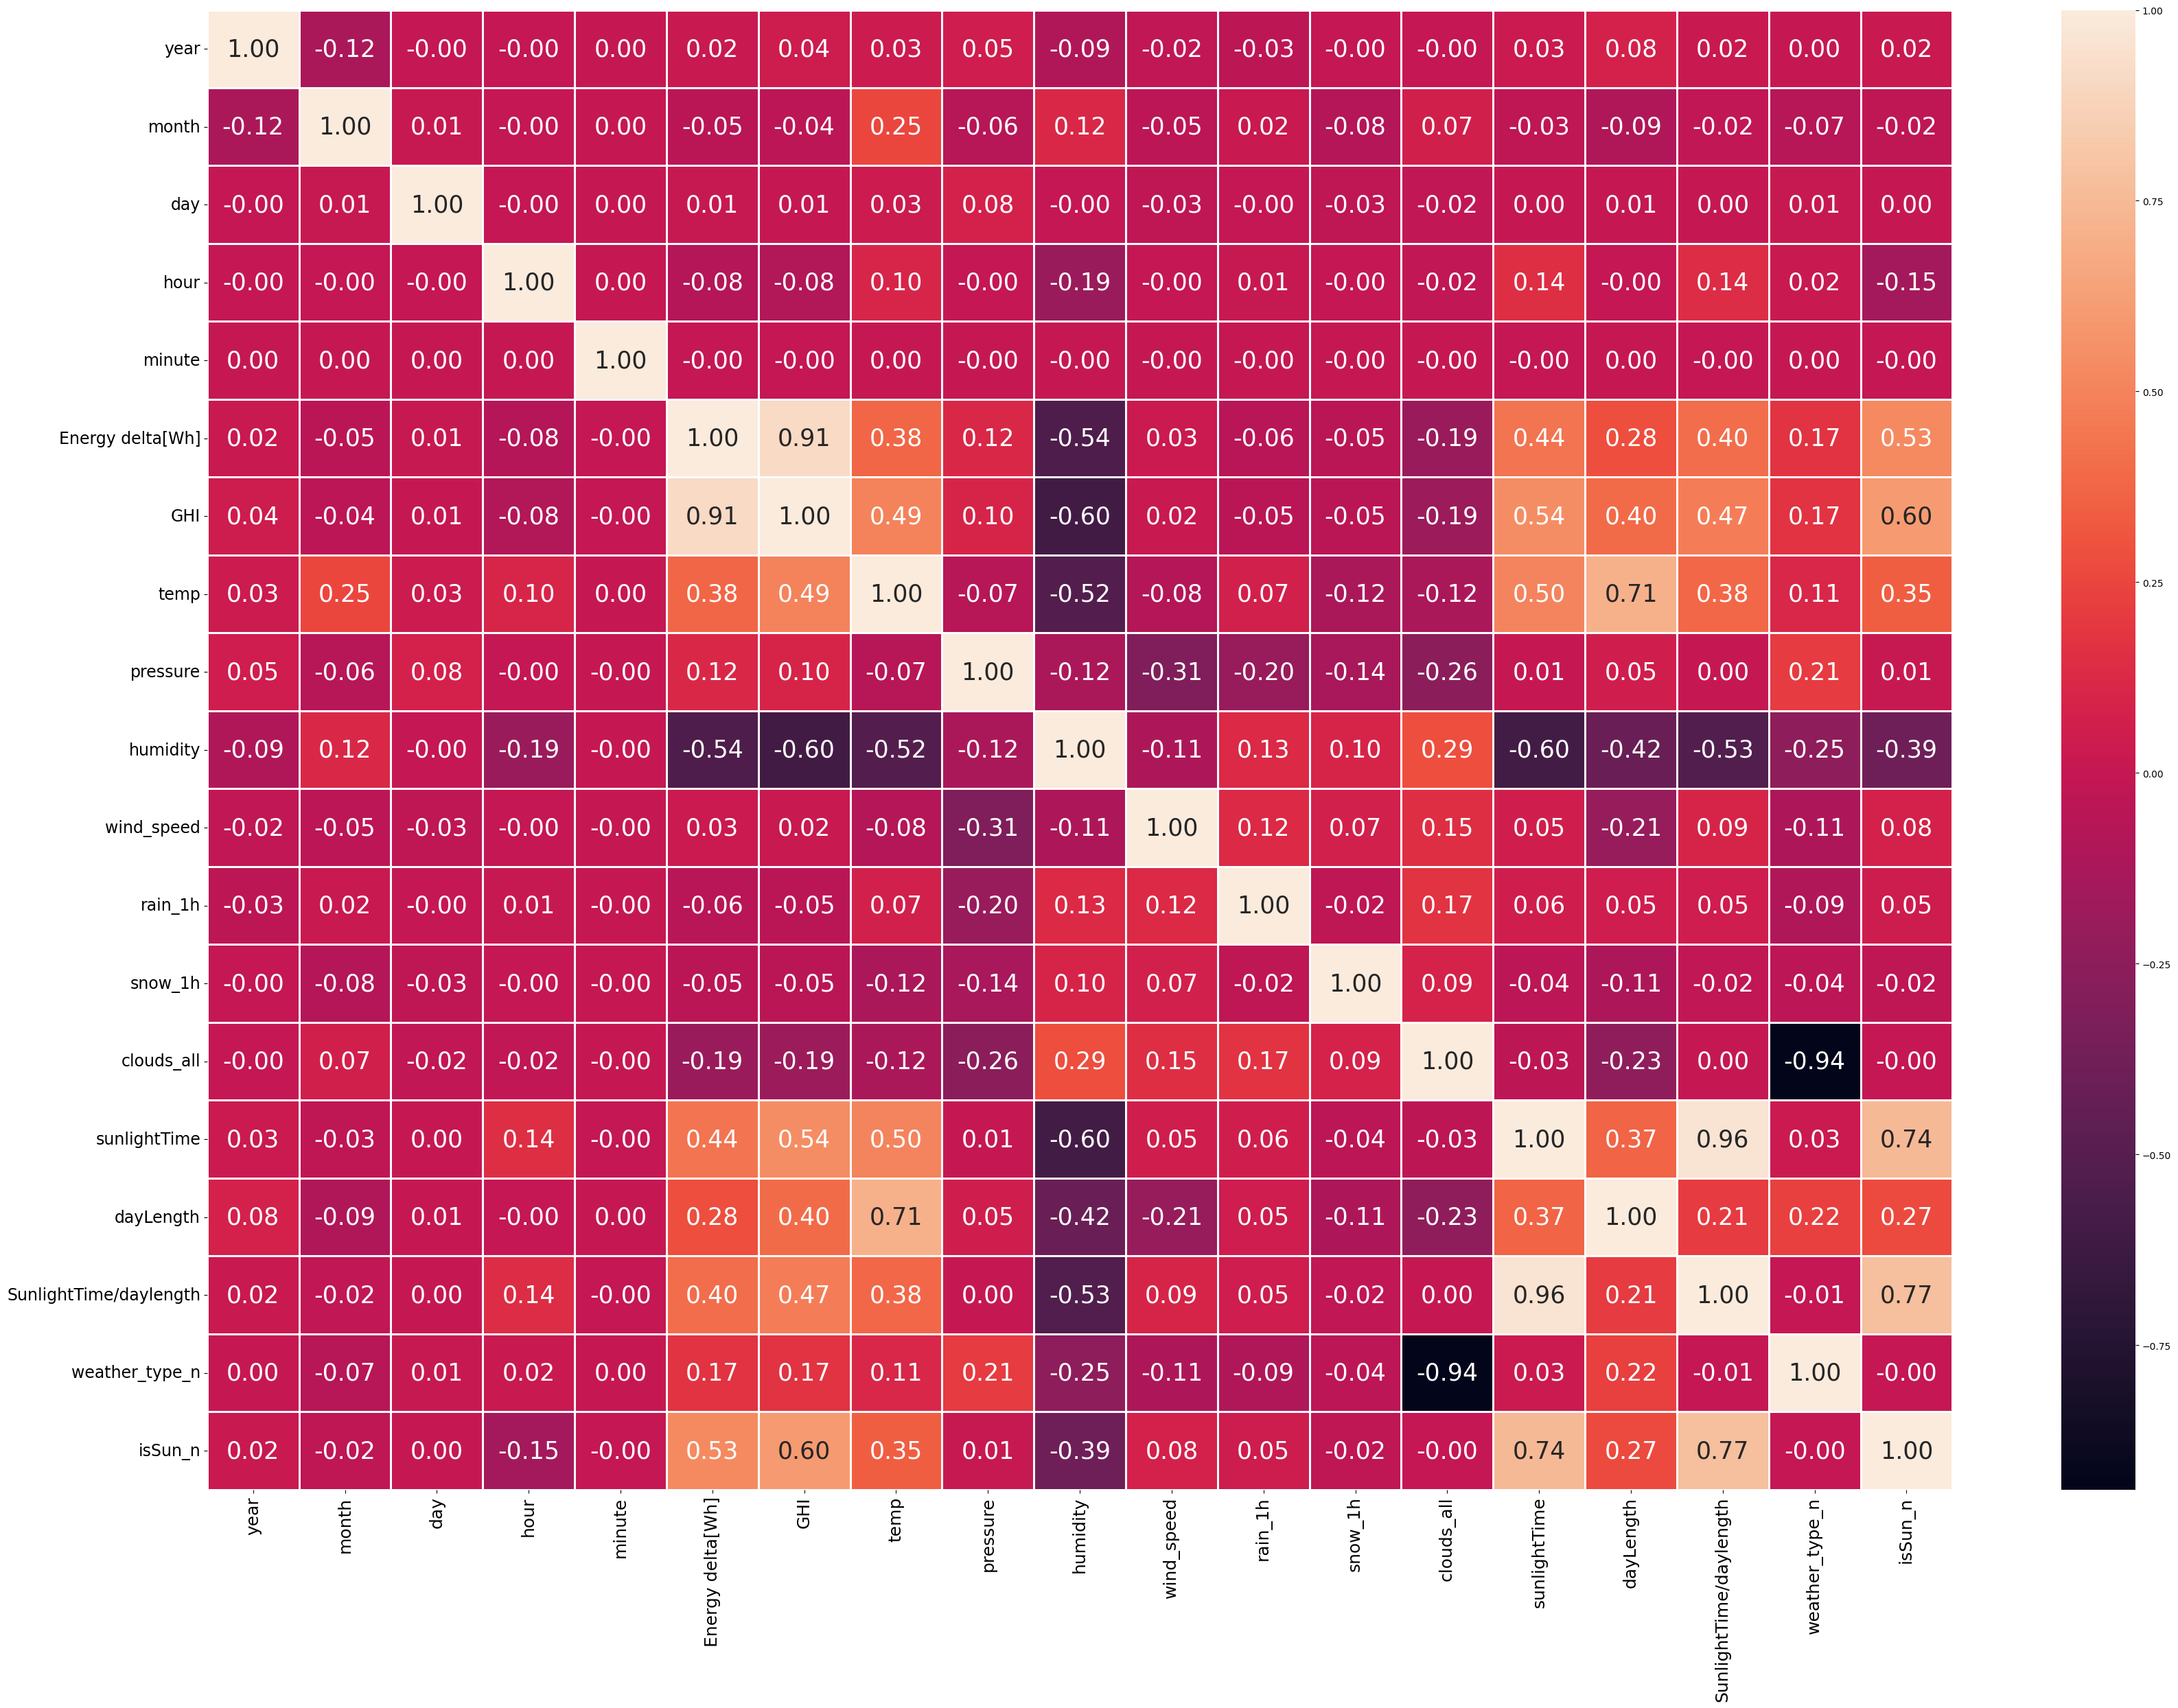

In [10]:
#correlacion
import seaborn as sns
import matplotlib.pyplot as plt 
correlation_matrix = df2.corr()

# Visualizar la matriz de correlación usando un heatmap
fig, axis = plt.subplots(figsize=(35,25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linecolor='white', linewidths=1, annot_kws={"size": 25})
plt.xticks(fontsize=18)
plt.yticks(fontsize=17)
plt.tight_layout()
plt.show()

**There are some  relation between**

**There are some  relation between**
- **Month-temp(0.25)** Indica una relación positiva débil. La temperatura tiende a aumentar o disminuir con el cambio de mes, pero hay una gran variabilidad debido a otros factores.

- **Month-humidity(0.12)** Indica una relación muy débil. La humedad no muestra un patrón claro de cambio con el mes, sugiriendo que otros factores son más influyentes.
**En resumen, la relación entre el mes y la temperatura refleja las variaciones estacionales que son típicas en muchos climas, aunque no de manera muy fuerte. La relación entre el mes y la humedad es más débil porque la humedad depende de muchos otros factores además de los cambios estacionales.**


**MINUTE - no tiene ninguna corelacion con variables, a alo lagropodemos eliminar la**

**There are some  relation between**
- **Hour-sunlighttIME/Daylenth(0.14)**
Una correlación de 0.14 entre la hora y la duración de la luz solar o la duración del día indica una relación positiva débil. Esto sugiere que hay una ligera tendencia a que la duración de la luz solar esté relacionada con la hora del día, pero la relación no es muy fuerte.

**There are strong negative relation between**
- **Energy delta-Huidity(-0.54)**
    - **Descripción: A medida que la humedad aumenta, la variabilidad en la energía (delta de energía) tiende a disminuir.**
      **Explicación:**
      **En condiciones de alta humedad, es probable que haya más nubosidad y menor radiación solar directa, lo que reduce la eficiencia de la producción de energía solar.**
- **Ght-Huidity(-0.60)**
     **Descripción: A medida que la humedad aumenta, la irradiancia horizontal global (cantidad de radiación solar recibida en una superficie horizontal) disminuye.**
    **Explicación:**
    **Alta humedad está asociada con mayor nubosidad. Las nubes y el vapor de agua en la atmósfera dispersan y absorben la luz solar, reduciendo la cantidad de radiación solar que llega a la superficie terrestre.**
- **Temp-Huidity(-0.52)**
    **Descripción: A medida que la humedad aumenta, la temperatura tiende a disminuir.**
      **Explicación:**
    **En climas húmedos, la evaporación y la presencia de nubes pueden tener un efecto refrescante durante el día.**
- **Pressure-Huidity(-0.12)**
    **Descripción: A medida que la humedad aumenta, la presión tiende a disminuir, aunque la relación es débil.**
    **Explicación:**
    **Alta humedad está frecuentemente asociada con sistemas de baja presión, como frentes fríos o tormentas.**

- **SunlightTime/daylenght-Huidity(-0.53)**
- **SunlightTime-Huidity(-0.60)**
- **IsSun_n-Huidity(-0.30)**
    **Descripción: A medida que la cantidad de tiempo con luz solar directa aumenta, la humedad tiende a disminuir.**
    **Explicación:**
    **Mayor cantidad de luz solar directa está asociada con condiciones menos nubladas y más secas, lo que reduce la humedad relativa.**

- **day Lenghht-Huidity(-0.42)**
   **Descripción: A medida que la longitud del día aumenta, la humedad tiende a disminuir.**
   **Explicación:**
   **En épocas del año con días más largos (como el verano), las temperaturas suelen ser más altas, lo que reduce la humedad relativa debido a la mayor capacidad del aire caliente para retener vapor **agua.**

- **Where_type-Huidity(-0.25)**
    **Una correlación de -0.25 entre Where_type y la humedad indica una relación negativa débil. Esto significa que ciertos tipos de lugares tienden a tener diferentes niveles de humedad, y a medida que cambiamos de un tipo de lugar a otro, la humedad puede variar de manera sistemática, aunque la relación no es muy fuerte.**
   
 - **Hour-humidity(-0.19)** Una correlación de -0.19 entre la hora y la humedad indica una relación negativa débil. Esto significa que a medida que avanza el día, la humedad tiende a disminuir ligeramente, pero no de manera muy fuert


Resumen General:
Las relaciones indican que a medida que la humedad aumenta, disminuyen parámetros como la variabilidad energética, irradiancia solar, temperatura y tiempo de luz solar directa. La humedad está asociada con condiciones más nubladas, menos eficientes para la energía solar y más frescas. La longitud del día y el tipo de lugar también afectan la humedad, aunque con una relación más débil.

**There are strong Positive  relation between**
- **Ghi-Energy(0,91)**
    Descripción: A mayor irradiancia horizontal global, mayor producción de energía.
- **Temp-Energy(0,38)**
    Descripción: A mayor temperatura, mayor producción de energía.
- **Whether_type-Energy(0,38)**
    El tipo de lugar influye en la disponibilidad de radiación solar y condiciones ambientales. Por ejemplo, áreas desérticas o zonas con alta exposición solar generalmente producen más energía solar.

- **DayLenght-Energy(0,28)**
    Descripción: A mayor longitud del día, mayor producción de energía.
- **Sunlight-Energy(0,44)**
    Descripción: A mayor cantidad de luz solar, mayor producción de energía
- **SunLight/daylenght-Energy(0,40)**
    A mayor combinación de luz solar y duración del día, mayor producción de energía.
- **isSun-Energy(0,53)**
    La presencia de sol aumenta la producción de energía. 

Resumen General
Las relaciones positivas fuertes indican que la producción de energía está fuertemente influenciada por la irradiancia solar, la temperatura, el tipo de lugar, la duración del día y la cantidad de luz solar. Estos factores son críticos para la eficiencia y la cantidad de energía generada, especialmente en sistemas solares fotovoltaicos. En general, las condiciones que aumentan la disponibilidad de radiación solar y las horas de luz del día tienden a aumentar significativamente la producción de energía.

**There are strong Positive  relation between**

- **Ghi-temp(0,48)**
   Más irradiancia solar significa más energía solar que calienta la superficie terrestre, elevando la temperatura del aire.
- **Ghi-sunlight(0,54)**
   A mayor irradiancia horizontal global, mayor cantidad de luz solar directa.
- **Ghi-daylenght(0,40)**
   Días más largos permiten más horas de exposición solar, incrementando la irradiancia total recibida.
- **Ghi-sunlight/daylenght(0,47)**
   A mayor combinación de luz solar y duración del día, mayor irradiancia horizontal global.
- **Ghi-isSun(0,60)**
   Alta irradiancia solar está asociada con condiciones despejadas y soleadas, aumentando la cantidad de días con sol directo.

**<span style="color:#004080;">Resumen General"</span>**
**<span style="color:#004080;">Las relaciones positivas indican que la irradiancia horizontal global (GHI) está fuertemente influenciada por la temperatura, la cantidad de luz solar, la longitud del día, y la frecuencia de días soleados. Estos factores se complementan, ya que más horas de luz solar y días despejados aumentan la energía solar recibida, calentando la atmósfera y extendiendo la duración de la irradiancia sola"</span>**


**<span style="color:#004080;">GHI significa "Global Horizontal Irradiance"</span>**

**<span style="color:#004080;">Global Horizontal Irradiance" en inglés, que se traduce al español como "Irradiancia Global Horizontal". Es una medida de la cantidad de radiación solar que llega a la superficie de la Tierra horizontalmente en un área determinada durante un período específico de tiempo. La unidad de medida típica para GHI es Watts por metro cuadrado (W/m²)."</span>**

**<span style="color:#004080;">En el contexto de tu conjunto de datos sobre generación de energía renovable y condiciones meteorológicas, es probable que la columna "GHI" represente la irradiancia solar medida en la ubicación específica de tus datos. Esta medida es importante porque la cantidad de radiación solar incidente puede afectar significativamente la generación de energía solar."</span>**

**There are strong  relation between**

- **Clouds_all-whether_type(-0,94)**
   Diferentes tipos de clima (por ejemplo, soleado, nublado, tormentoso) están directamente influenciados por la cantidad de cobertura nubosa
- **Clouds_all-pressure(-0,26)**
   Las áreas de baja presión suelen estar asociadas con mayor cobertura nubosa y condiciones meteorológicas inestables, como tormentas y frentes fríos
- **Clouds_all-humididy(0,29)**
   Las nubes son formaciones de vapor de agua condensado, por lo que una mayor cobertura nubosa indica más humedad en la atmósfera.
- **Clouds_all-wind_speed(0,15)**
   A mayor cobertura nubosa, mayor velocidad del viento..
- **Clouds_all-irain-1h(0,17)**
   A mayor cobertura nubosa, mayor cantidad de lluvia en una hora.

**<span style="color:#004080;">Resumen General"</span>**
**<span style="color:#004080;">Las relaciones indican que la cobertura nubosa está estrechamente relacionada con varios parámetros climáticos. Una alta cobertura nubosa generalmente se asocia con climas más húmedos, mayor probabilidad de lluvia, y condiciones de baja presión y vientos más fuertes. La relación negativa con el tipo de clima destaca cómo la cantidad de nubes puede definir diferentes condiciones meteorológicas, mientras que las correlaciones positivas con la humedad, la velocidad del viento y la precipitación subrayan el papel crucial de las nubes en el clima."</span>**

Conclusión
<span style="color:green">Las relaciones identificadas muestran cómo la humedad, la irradiancia solar, la temperatura, la longitud del día y la nubosidad interactúan para influir en la producción de energía y las condiciones climáticas. La producción de energía solar está fuertemente influenciada por la cantidad de luz solar recibida y las condiciones meteorológicas, mientras que la humedad y la cobertura nubosa juegan un papel crucial en la determinación de la irradiancia solar y la temperatura. Estas relaciones subrayan la interdependencia de factores climáticos y de energía, destacando la importancia de la irradiancia solar y las condiciones climáticas para la eficiencia y la variabilidad en la producción de energía.</span>

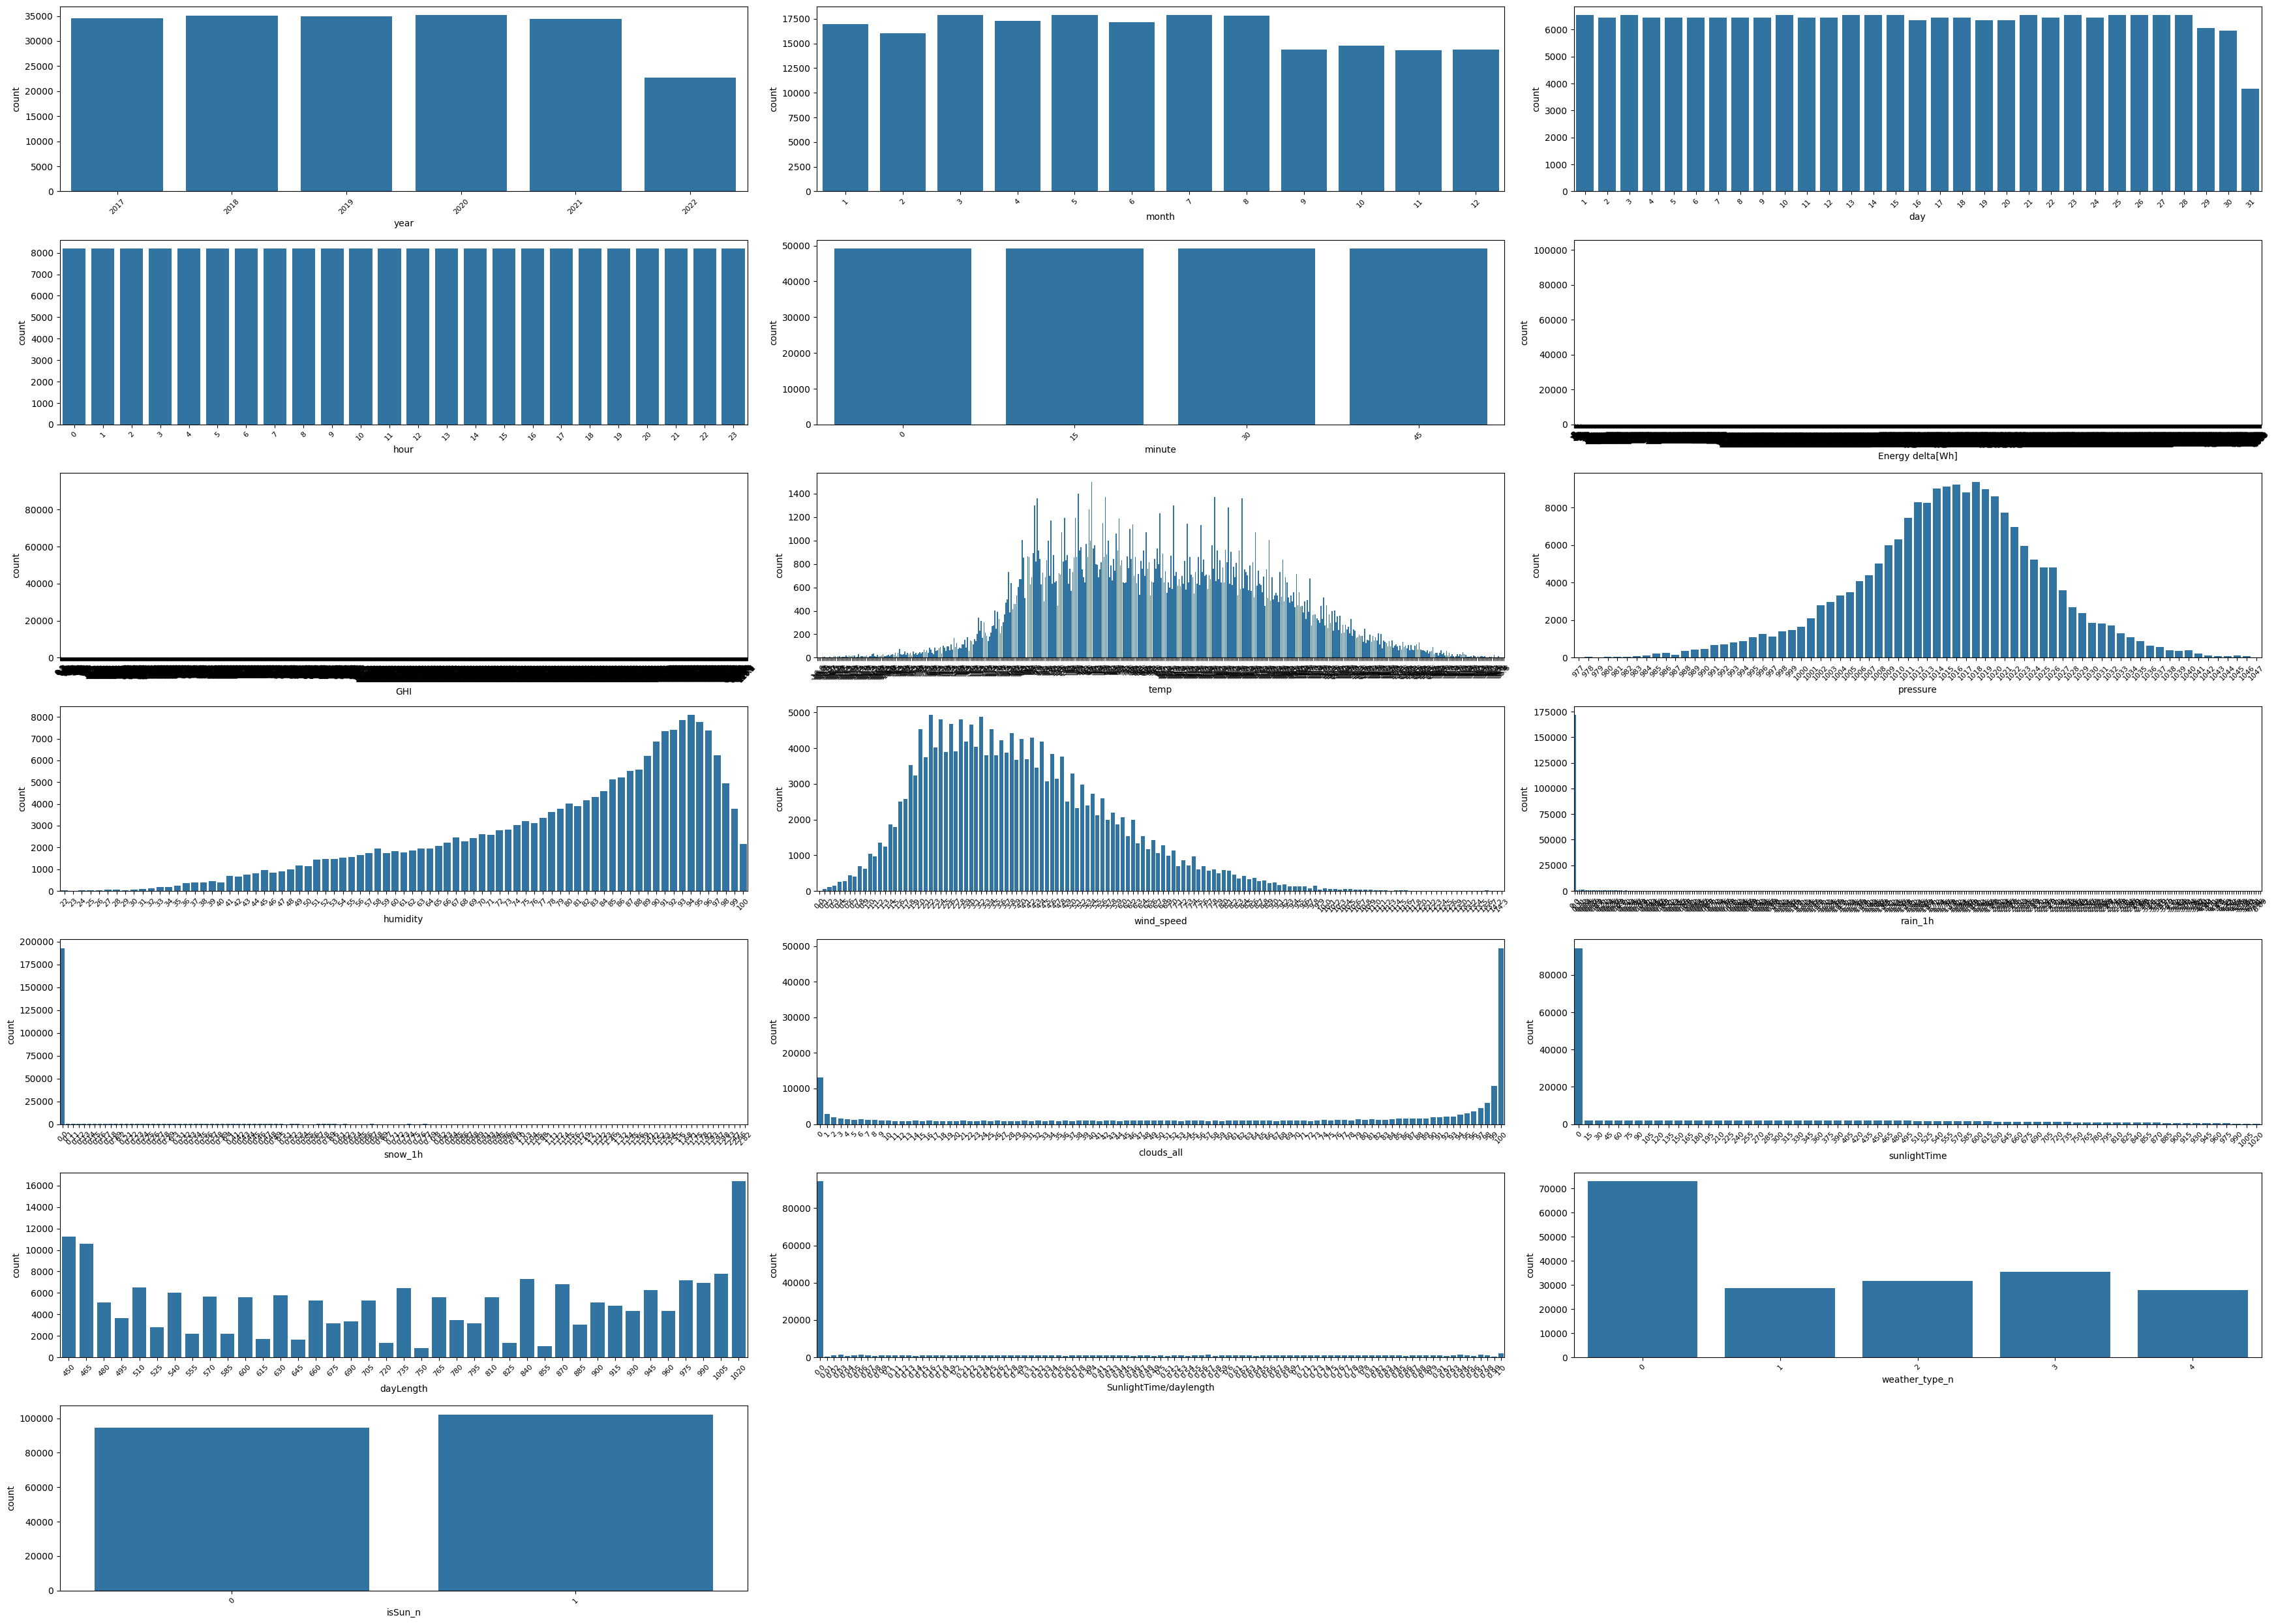

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de tamaño del gráfico
plt.figure(figsize=(35, 25))

# Obtener el número total de columnas y calcular el número de filas necesarias
num_columnas = len(df2.columns)
num_filas = (num_columnas - 1) // 3 + 1  # Se redondea hacia arriba

# Iterar sobre las columnas seleccionadas
for i, columna in enumerate(df2.columns):
    plt.subplot(num_filas, 3, i + 1)  # Crear un subplot
    sns.countplot(data=df2, x=columna)  # Crear el countplot
    plt.xticks(rotation=45, fontsize=8)  # Rotar etiquetas del eje x y ajustar su tamaño
    plt.xlabel(columna, fontsize=10)  # Añadir etiqueta del eje x

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()  # Mostrar los gráficos


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2,random_state = 12)
model.fit( X_test, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

## Métricas de Evaluación

In [ ]:
from sklearn.metrics import mean_squared_error

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Supongamos que y_test y y_pred ya están definidos
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

In [ ]:
targetestatistic=total_final_data['Energy delta[Wh]'].describe()
targetestatistic

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Definimos el modelo
model = DecisionTreeRegressor(random_state=12)

# Definimos el espacio de hiperparámetros a explorar
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Configuramos la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Entrenamos el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros
best_params = grid_search.best_params_

print("Mejores hiperparámetros encontrados:", best_params)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Definir el modelo con los mejores hiperparámetros encontrados
best_params = {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
model = DecisionTreeRegressor(**best_params, random_state=12)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluar el rendimiento del modelo
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = train_mse ** 0.5
test_rmse = test_mse ** 0.5

print(f"Error cuadrático medio en entrenamiento (MSE): {train_mse}")
print(f"Raíz del error cuadrático medio en entrenamiento (RMSE): {train_rmse}")
print(f"Error cuadrático medio en prueba (MSE): {test_mse}")
print(f"Raíz del error cuadrático medio en prueba (RMSE): {test_rmse}")

In [ ]:
resultado no ha sido preciso , 10% de error
max 5020 y RMSE ES 297 , el error es 6% hay buena presicion con 94%

In [ ]:
dump(model, open("decision_tree_regressor_default_42.sav", "wb"))

otuna hiperparametros 

In [ ]:
def objective(trial):
    # Sugerir valores para los hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 5, 105)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Crear el modelo Random Forest con los hiperparámetros sugeridos
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=8
    )

    # Entrenar el modelo
    model.fit(X_train_sel, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test_sel)

    # Calcular el Error Cuadrático Medio
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Crear un estudio de Optuna para optimizar los hiperparámetros
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

# Imprimir los mejores hiperparámetros encontrados
print("Número de pruebas realizadas:", len(study.trials))
print("Mejores hiperparámetros:", study.best_params)
print("Mejor MSE:", study.best_value)